# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [14]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for column in columns:
    print(f"{column['name']}, {column['type']}")

id, INTEGER
emoji_char, TEXT
emoji_id, TEXT
name, TEXT
score, INTEGER


In [16]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute("SELECT * FROM emoji LIMIT 10").fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect database and Query

In [17]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [18]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [25]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).order_by(Emoji.score.desc()).limit(10).all()
results

[('😂', '1F602', 1814832150),
 ('❤️', '2764', 840619939),
 ('😍', '1F60D', 680382416),
 ('♥️', '2665', 652715459),
 ('😭', '1F62D', 515991922),
 ('😊', '1F60A', 484540701),
 ('♻️', '267B', 452489849),
 ('😒', '1F612', 441690175),
 ('💕', '1F495', 381679908),
 ('😘', '1F618', 377847645)]

Unpack tuples using list comprehensions

In [32]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
emoji_id = []
scores = []
for row in results:
    emoji_id.append(row[1])
    scores.append(row[2])

## Plot using Matplotlib

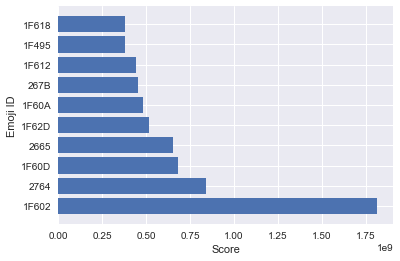

In [39]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
plt.barh(emoji_id, scores)
plt.xlabel('Score')
plt.ylabel('Emoji ID')

plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [ ]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df.head(10)

Plot using Pandas

In [ ]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE

In [ ]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE